<h1><center>CodeAlpha - Machine Learning Internship </center></h1>
<h1><center>Task 1 : Credit Scoring Model </center></h1>

Aim : Develop a credit scoring model to predict the
creditworthiness of individuals based on historical
financial data. Utilize classification algorithms and
assess the model's accuracy. 

Dataset Source - https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

chunk_size = 10000  
df = pd.read_csv("loan.csv", low_memory=False, chunksize=chunk_size)

for df in df:
   
    print(df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade  ... total_bal_il il_util  \
0     10.65       162.87     B        B2  ...          NaN     NaN   
1     15.27        59.83     C        C4  ...          NaN     NaN   
2     15.96        84.33     C        C5  ...          NaN     NaN   
3     13.49       339.31     C        C1  ...          NaN     NaN   
4     12.69        67.79     B        B5  ...          NaN     NaN   

  open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN          NaN        Na

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
60000  9008849   10800773    28000.0      28000.0          28000.0   
60001  8988513   10770413    25000.0      25000.0          25000.0   
60002  8836587   10628585    25000.0      25000.0          25000.0   
60003  8834615   10626766     7750.0       7750.0           7750.0   
60004  7485539    9147630    22250.0      22250.0          22250.0   

             term  int_rate  installment grade sub_grade  ... total_bal_il  \
60000   36 months      7.62       872.52     A        A3  ...          NaN   
60001   36 months     12.99       842.23     B        B4  ...          NaN   
60002   60 months     21.70       686.22     E        E2  ...          NaN   
60003   36 months     17.10       276.70     C        C5  ...          NaN   
60004   60 months     23.10       628.52     E        E4  ...          NaN   

      il_util open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim  \
60000     NaN         NaN      

             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
120000  5977848    7450282    28100.0      28100.0          28050.0   
120001  5969258    7441698    11000.0      11000.0          11000.0   
120002  5978999    7451446    25000.0      25000.0          25000.0   
120003  5979160    7451611    20000.0      20000.0          20000.0   
120004  5969240    7441682    24925.0      24925.0          24925.0   

              term  int_rate  installment grade sub_grade  ... total_bal_il  \
120000   60 months     10.64       605.93     B        B2  ...          NaN   
120001   36 months      9.71       353.45     B        B1  ...          NaN   
120002   36 months     15.88       877.45     C        C4  ...          NaN   
120003   60 months      8.90       414.20     A        A5  ...          NaN   
120004   60 months     14.33       584.24     C        C2  ...          NaN   

       il_util open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim  \
120000     NaN    

             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
180000  2310124    2742668    21000.0      21000.0          20975.0   
180001  2334829    2776980    20000.0      20000.0          19975.0   
180002  2377392    2839747    24000.0      24000.0          24000.0   
180003  2366170    2828474    16000.0      16000.0          16000.0   
180004  2377432    2839791    16850.0      16850.0          16850.0   

              term  int_rate  installment grade sub_grade  ... total_bal_il  \
180000   36 months     12.12       698.71     B        B3  ...          NaN   
180001   60 months     13.11       456.19     B        B4  ...          NaN   
180002   60 months     15.31       574.88     C        C2  ...          NaN   
180003   60 months     21.49       437.28     E        E3  ...          NaN   
180004   60 months     21.98       465.19     E        E4  ...          NaN   

       il_util open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim  \
180000     NaN    

              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
240000  34452321   37115608    14000.0      14000.0          14000.0   
240001  36018732   38720287    15000.0      15000.0          15000.0   
240002  36069644   38781301    22200.0      22200.0          22200.0   
240003  35969482   38671103    15000.0      15000.0          15000.0   
240004  36049317   38760931    11000.0      11000.0          11000.0   

              term  int_rate  installment grade sub_grade  ... total_bal_il  \
240000   60 months      9.49       293.96     B        B2  ...          NaN   
240001   60 months     12.99       341.22     C        C2  ...          NaN   
240002   60 months     10.49       477.06     B        B3  ...          NaN   
240003   60 months     17.14       373.92     D        D4  ...          NaN   
240004   36 months     11.99       365.31     B        B5  ...          NaN   

       il_util open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim  \
240000     N

              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
300000  28753264   31226407    20000.0      20000.0          20000.0   
300001  28682659   31145778    23000.0      23000.0          23000.0   
300002  28753254   31226396     5000.0       5000.0           5000.0   
300003  28673188   31206340    16000.0      16000.0          16000.0   
300004  28673151   31206303    23000.0      23000.0          23000.0   

              term  int_rate  installment grade sub_grade  ... total_bal_il  \
300000   60 months     12.99       454.96     C        C1  ...          NaN   
300001   60 months     16.29       562.87     D        D2  ...          NaN   
300002   36 months     13.35       169.32     C        C2  ...          NaN   
300003   60 months     12.99       363.97     C        C1  ...          NaN   
300004   36 months      6.49       704.83     A        A2  ...          NaN   

       il_util open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim  \
300000     N

              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
360000  20037104   22299859    21725.0      21725.0          21725.0   
360001  19977925   22200570    15000.0      15000.0          15000.0   
360002  19897197   22119933    10000.0      10000.0          10000.0   
360003  19948160   22170756    12000.0      12000.0          12000.0   
360004  20027085   22289841    22800.0      22800.0          22800.0   

              term  int_rate  installment grade sub_grade  ... total_bal_il  \
360000   60 months     19.52       569.80     E        E2  ...          NaN   
360001   60 months     14.99       356.78     C        C5  ...          NaN   
360002   36 months     13.98       341.68     C        C3  ...          NaN   
360003   36 months     13.35       406.36     C        C2  ...          NaN   
360004   60 months     17.57       573.66     D        D4  ...          NaN   

       il_util open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim  \
360000     N

              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
420000  13197127   15229314    25000.0      25000.0          24800.0   
420001  13157115   15189303    15000.0      15000.0          15000.0   
420002  13177162   15209352    25000.0      25000.0          25000.0   
420003  13187087   15219277    28000.0      28000.0          28000.0   
420004  13175802   15208003    21725.0      21725.0          21675.0   

              term  int_rate  installment grade sub_grade  ... total_bal_il  \
420000   36 months      8.90       793.84     A        A5  ...          NaN   
420001   36 months      8.90       476.30     A        A5  ...          NaN   
420002   36 months     19.47       922.36     D        D5  ...          NaN   
420003   36 months      7.90       876.13     A        A4  ...          NaN   
420004   60 months     20.49       581.52     E        E2  ...          NaN   

       il_util open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim  \
420000     N

              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
480000  67309042   72110837    28000.0      28000.0          28000.0   
480001  67279351   72081132    24000.0      24000.0          23950.0   
480002  67269172   72070975     5000.0       5000.0           5000.0   
480003  67289135   72090910    16800.0      16800.0          16800.0   
480004  67349202   72151004    30000.0      30000.0          30000.0   

              term  int_rate  installment grade sub_grade  ... total_bal_il  \
480000   60 months     18.20       714.07     E        E1  ...      20824.0   
480001   36 months     11.22       788.24     B        B5  ...      78001.0   
480002   36 months      8.38       157.56     B        B1  ...      20586.0   
480003   36 months      5.32       505.93     A        A1  ...          0.0   
480004   36 months     13.18      1013.43     C        C3  ...      22853.0   

       il_util open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim  \
480000    42

              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
540000  61313675   65432523    20000.0      20000.0          19750.0   
540001  64098851   68529625    11200.0      11200.0          11200.0   
540002  63878993   68309765    21000.0      21000.0          21000.0   
540003  63858523   68268235    12000.0      12000.0          12000.0   
540004  64068292   68499040    11200.0      11200.0          11200.0   

              term  int_rate  installment grade sub_grade  ... total_bal_il  \
540000   36 months     11.49       659.43     B        B5  ...          NaN   
540001   60 months     13.18       255.87     C        C3  ...          NaN   
540002   60 months      9.17       437.67     B        B2  ...          NaN   
540003   60 months     13.67       277.18     C        C4  ...          NaN   
540004   60 months     13.67       258.70     C        C4  ...          NaN   

       il_util open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim  \
540000     N

              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
600000  60911146   64952875    12900.0      12900.0          12900.0   
600001  60970489   65012205     9000.0       9000.0           9000.0   
600002  60810882   64842623    11075.0      11075.0          11075.0   
600003  60780826   64822555    11100.0      11100.0          11025.0   
600004  60930879   64972619    15000.0      15000.0          15000.0   

              term  int_rate  installment grade sub_grade  ... total_bal_il  \
600000   36 months      6.89       397.67     A        A3  ...          NaN   
600001   36 months      8.18       282.78     B        B1  ...          NaN   
600002   36 months     13.33       374.93     C        C3  ...          NaN   
600003   36 months     14.65       382.89     C        C5  ...          NaN   
600004   36 months      6.89       462.41     A        A3  ...          NaN   

       il_util open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim  \
600000     N

              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
660000  56360551   60032278     9500.0       9500.0           9500.0   
660001  56310358   59982081    12000.0      12000.0          12000.0   
660002  56230589   59902316    30850.0      30850.0          30850.0   
660003  56270863   59942599    15000.0      15000.0          15000.0   
660004  56320457   59992186    11000.0      11000.0          11000.0   

              term  int_rate  installment grade sub_grade  ... total_bal_il  \
660000   36 months      7.89       297.22     A        A5  ...          NaN   
660001   60 months     14.65       283.28     C        C5  ...          NaN   
660002   36 months     12.29      1028.94     C        C1  ...          NaN   
660003   36 months      8.18       471.30     B        B1  ...          NaN   
660004   36 months      5.32       331.27     A        A1  ...          NaN   

       il_util open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim  \
660000     N

              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
720000  52056355   55486072    10500.0      10500.0          10500.0   
720001  51996182   55425898     7500.0       7500.0           7500.0   
720002  51826226   55255939    18000.0      18000.0          18000.0   
720003  52046355   55476070     9000.0       9000.0           8975.0   
720004  51876516   55306237    14500.0      14500.0          14500.0   

              term  int_rate  installment grade sub_grade  ... total_bal_il  \
720000   36 months     17.86       378.87     D        D5  ...          NaN   
720001   36 months      7.26       232.48     A        A4  ...          NaN   
720002   36 months     12.69       603.81     C        C2  ...          NaN   
720003   36 months      9.17       286.92     B        B2  ...          NaN   
720004   36 months      9.17       462.25     B        B2  ...          NaN   

       il_util open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim  \
720000     N

              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
780000  46376519   49514249     5050.0       5050.0           5050.0   
780001  46366584   49504322    20000.0      20000.0          20000.0   
780002  44775960   47853701    10000.0      10000.0          10000.0   
780003  13177184   15209375     7200.0       7200.0           7200.0   
780004  46376986   49514734    18000.0      18000.0          18000.0   

              term  int_rate  installment grade sub_grade  ... total_bal_il  \
780000   36 months     15.61       176.58     D        D1  ...          NaN   
780001   36 months     14.65       689.89     C        C5  ...          NaN   
780002   36 months      9.17       318.79     B        B2  ...          NaN   
780003   36 months     15.61       251.75     D        D1  ...          NaN   
780004   60 months     22.99       507.33     F        F1  ...          NaN   

       il_util open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim  \
780000     N

              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
840000  41019943   43895714    35000.0      35000.0          35000.0   
840001  41139792   44015555    20000.0      20000.0          20000.0   
840002  41029616   43905354    14175.0      14175.0          14175.0   
840003  40929938   43805687    28000.0      28000.0          28000.0   
840004  41019883   43895651    20000.0      20000.0          20000.0   

              term  int_rate  installment grade sub_grade  ... total_bal_il  \
840000   60 months     17.57       880.61     D        D4  ...          NaN   
840001   36 months     11.53       659.81     B        B5  ...          NaN   
840002   60 months     13.33       324.93     C        C3  ...          NaN   
840003   60 months     10.99       608.65     B        B4  ...          NaN   
840004   36 months     12.29       667.06     C        C1  ...          NaN   

       il_util open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim  \
840000     N

In [4]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
880000,38635655,41419451,9600.0,9600.0,9600.0,36 months,11.99,318.82,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,8200.0,NaN,NaN,NaN
880001,38455565,41249368,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,19600.0,NaN,NaN,NaN
880002,38455625,41249431,8500.0,8500.0,8500.0,36 months,17.86,306.70,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,22500.0,NaN,NaN,NaN
880003,38445821,41229609,8000.0,8000.0,8000.0,36 months,11.44,263.58,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,11100.0,NaN,NaN,NaN
880004,38515718,41309521,10375.0,10375.0,10375.0,36 months,17.86,374.36,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,51300.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


In [5]:
df.shape

(7379, 74)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7379 entries, 880000 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           7379 non-null   int64  
 1   member_id                    7379 non-null   int64  
 2   loan_amnt                    7379 non-null   float64
 3   funded_amnt                  7379 non-null   float64
 4   funded_amnt_inv              7379 non-null   float64
 5   term                         7379 non-null   object 
 6   int_rate                     7379 non-null   float64
 7   installment                  7379 non-null   float64
 8   grade                        7379 non-null   object 
 9   sub_grade                    7379 non-null   object 
 10  emp_title                    6974 non-null   object 
 11  emp_length                   6974 non-null   object 
 12  home_ownership               7379 non-null   object 
 13  annual_inc 

# Data Preprocessing

Minimizing the number of columns and removing missing values in the dataset will be our preprocessing of the data.

In [7]:
df.drop(df.columns.difference(['loan_amnt','term','int_rate','installment','grade','emp_length','home_ownership',
                                         'annual_inc','verification_status','loan_status','purpose',]),axis=1, inplace=True)

In [8]:
df.isnull().sum()

loan_amnt                0
term                     0
int_rate                 0
installment              0
grade                    0
emp_length             405
home_ownership           0
annual_inc               0
verification_status      0
loan_status              0
purpose                  0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7379 entries, 880000 to 887378
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            7379 non-null   float64
 1   term                 7379 non-null   object 
 2   int_rate             7379 non-null   float64
 3   installment          7379 non-null   float64
 4   grade                7379 non-null   object 
 5   emp_length           6974 non-null   object 
 6   home_ownership       7379 non-null   object 
 7   annual_inc           7379 non-null   float64
 8   verification_status  7379 non-null   object 
 9   loan_status          7379 non-null   object 
 10  purpose              7379 non-null   object 
dtypes: float64(4), object(7)
memory usage: 634.3+ KB


In [10]:
df.annual_inc = df.annual_inc.fillna(0)
df.isnull().sum()

loan_amnt                0
term                     0
int_rate                 0
installment              0
grade                    0
emp_length             405
home_ownership           0
annual_inc               0
verification_status      0
loan_status              0
purpose                  0
dtype: int64

# Feature Engineering

In [11]:
label_categories = [
    (0, ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current']),
    (1, ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 
         'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'])
]

# function to apply the transformation
def classify_label(text):
    for category, matches in label_categories:
        if any(match in text for match in matches):
            return category
    return None

df.loc[:, 'label'] = df['loan_status'].apply(classify_label)
df = df.drop('loan_status', axis=1)

In [12]:
def SC_LabelEncoder1(text):
    if text == "E":
        return 1
    elif text == "D":
        return 2
    elif text == "C":
        return 3
    elif text == "B":
        return 4
    elif text == "A":
        return 5
    else:
        return 0

In [13]:
def SC_LabelEncoder2(text):
    if text == "< 1 year":
        return 1
    elif text == "1 year":
        return 2
    elif text == "2 years":
        return 3
    elif text == "3 years":
        return 4
    elif text == "4 years":
        return 5
    elif text == "5 years":
        return 6
    elif text == "6 years":
        return 7
    elif text == "7 years":
        return 8
    elif text == "8 years":
        return 9
    elif text == "9 years":
        return 10
    elif text == "10 years":
        return 11
    elif text == "10+ years":
        return 12
    else:
        return 0

In [14]:
def SC_LabelEncoder3(text):
    if text == "RENT":
        return 1
    elif text == "MORTGAGE":
        return 2
    elif text == "OWN":
        return 3
    else:
        return 0

In [15]:
df["grade"] = df["grade"].apply(SC_LabelEncoder1)
df["emp_length"] = df["emp_length"].apply(SC_LabelEncoder2)
df["home_ownership"] = df["home_ownership"].apply(SC_LabelEncoder3)

In [16]:
df.head(10)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,label
880000,9600.0,36 months,11.99,318.82,4,1,1,55000.0,Not Verified,debt_consolidation,0
880001,10000.0,36 months,11.99,332.10,4,2,1,25000.0,Source Verified,debt_consolidation,0
880002,8500.0,36 months,17.86,306.70,2,6,3,23782.0,Verified,debt_consolidation,0
880003,8000.0,36 months,11.44,263.58,4,12,1,71500.0,Verified,debt_consolidation,0
880004,10375.0,36 months,17.86,374.36,2,6,1,29000.0,Not Verified,debt_consolidation,1
880005,18000.0,60 months,11.44,395.33,4,12,3,85000.0,Source Verified,credit_card,0
880006,15625.0,60 months,17.86,395.59,2,12,2,57000.0,Not Verified,credit_card,0
880007,21900.0,36 months,13.66,744.88,3,8,2,50000.0,Source Verified,credit_card,0
880008,1500.0,36 months,15.59,52.44,2,12,1,90000.0,Not Verified,other,0
880009,5000.0,36 months,11.44,164.74,4,4,1,40000.0,Verified,credit_card,0


In [17]:
df.shape

(7379, 11)

In [18]:
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
purpose                0
label                  0
dtype: int64

# Exploring Data Analysis

Text(0.5, 1.0, 'Term/Verification Status distribution')

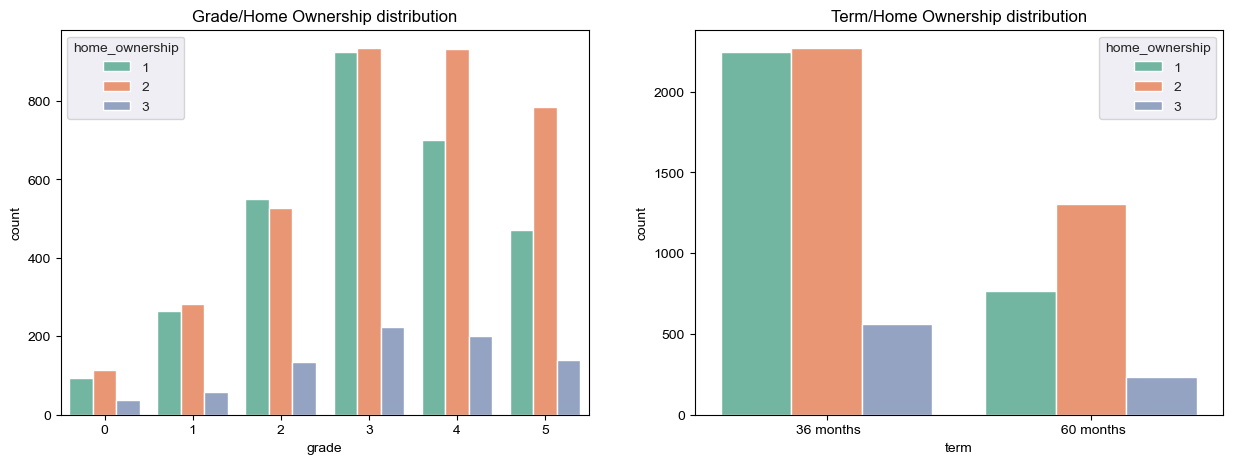

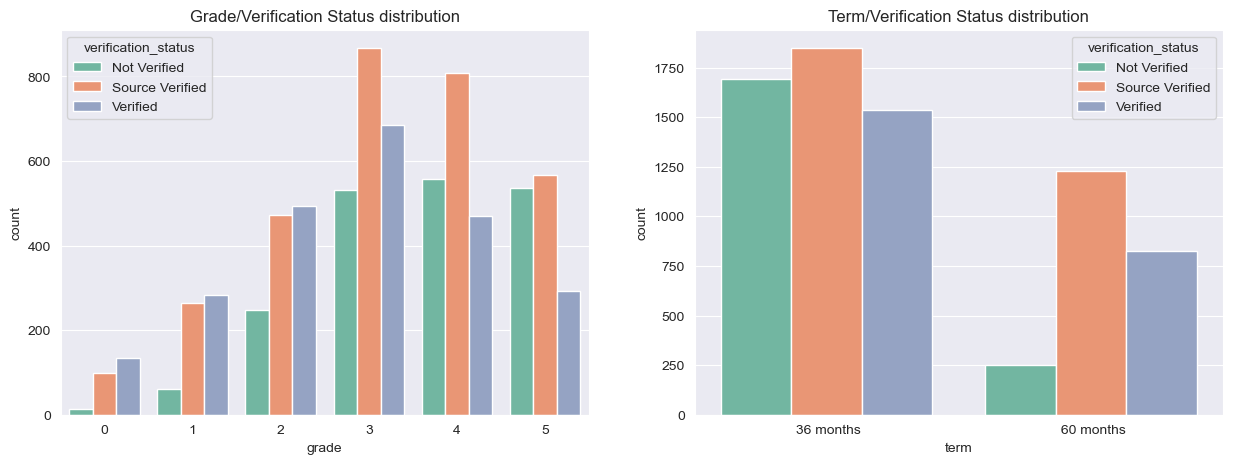

In [19]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.set_style('darkgrid')
sns.countplot(data=df,x = 'grade',hue = 'home_ownership' , ax = ax[0],palette='Set2').set_title("Grade/Home Ownership distribution")
sns.countplot(data=df,x = 'term',hue = 'home_ownership' , ax = ax[1],palette='Set2').set_title("Term/Home Ownership distribution")

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.set_style('darkgrid')
sns.countplot(data=df,x = 'grade',hue = 'verification_status' , ax = ax[0],palette='Set2').set_title("Grade/Verification Status distribution")
sns.countplot(data=df,x = 'term',hue = 'verification_status' , ax = ax[1],palette='Set2').set_title("Term/Verification Status distribution")

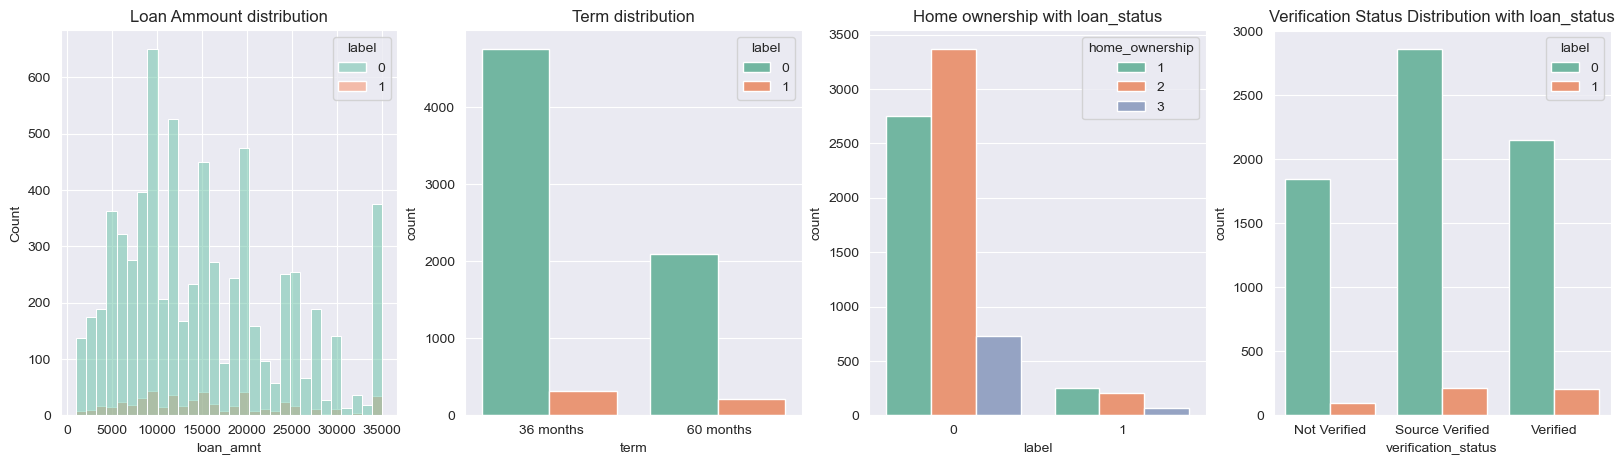

In [20]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
sns.histplot(df, x='loan_amnt',hue="label", bins=30, ax=ax[0],palette='Set2').set_title("Loan Ammount distribution");
sns.countplot(data=df, x='term', hue="label", ax=ax[1],palette='Set2').set_title("Term distribution");
sns.countplot(data=df, hue='home_ownership', x='label', ax=ax[2],palette='Set2').set_title("Home ownership with loan_status");
sns.countplot(data=df, x='verification_status', hue='label', ax=ax[3],palette='Set2').set_title("Verification Status Distribution with loan_status");

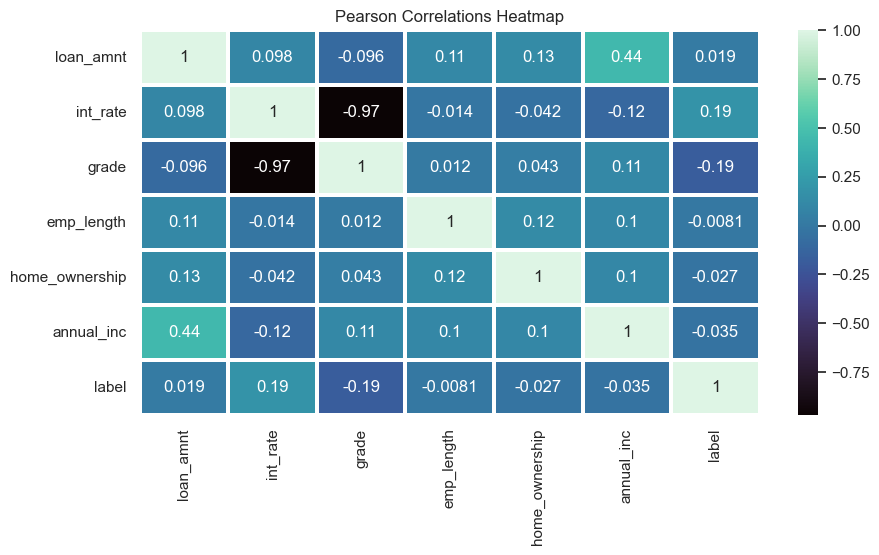

In [21]:
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(df[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc','label']].corr(),cbar=True,annot=True,
            linecolor='white',linewidths=1.5,cmap="mako").set_title("Pearson Correlations Heatmap");

# Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
for col in ["verification_status", "purpose","term"]:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [23]:
df.label = df.label.fillna(1)

# Splitting into Testing and Training

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
X, y = df.drop("label", axis=1), df["label"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.metrics import classification_report

In [29]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [30]:
acc = []
pre = []
f1 =[]
rec =[]

# Model Evaluation

## <i> K Nearest Neighbours </i>

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=10)

In [33]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=10)

In [34]:
pred_knn = knn.predict(X_test_scaled)

In [35]:
print("Classification Report :")
print(     classification_report(y_test,pred_knn))

Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1356
           1       0.00      0.00      0.00       120

    accuracy                           0.92      1476
   macro avg       0.46      0.50      0.48      1476
weighted avg       0.84      0.92      0.88      1476



In [36]:
print("Accuracy = ",accuracy_score(y_test,pred_knn))

Accuracy =  0.9173441734417345


In [37]:
acc.append(accuracy_score(y_test,pred_knn))
pre.append(precision_score(y_test,pred_knn))
rec.append(recall_score(y_test,pred_knn))
f1.append(f1_score(y_test,pred_knn))

## <i> Random Forest Classification </i>

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rftree = RandomForestClassifier(n_estimators=10)

In [40]:
rftree.fit(X_train_scaled,y_train)

RandomForestClassifier(n_estimators=10)

In [41]:
rftree_pred = rftree.predict(X_test_scaled)

In [42]:
print("Classification Report :")
print(classification_report(y_test,rftree_pred))

Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1356
           1       0.42      0.04      0.08       120

    accuracy                           0.92      1476
   macro avg       0.67      0.52      0.52      1476
weighted avg       0.88      0.92      0.89      1476



In [43]:
print("Accuracy = ",accuracy_score(y_test,rftree_pred))

Accuracy =  0.9173441734417345


In [44]:
acc.append(accuracy_score(y_test,rftree_pred))
pre.append(precision_score(y_test,rftree_pred))
rec.append(recall_score(y_test,rftree_pred))
f1.append(f1_score(y_test,rftree_pred))

## <i> Decision Tree Classification </i>

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dtree = DecisionTreeClassifier()

In [47]:
dtree.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [48]:
pred_dtree = dtree.predict(X_test)

In [49]:
print("Classification Report :")
print(classification_report(y_test,pred_dtree))

Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1356
           1       0.00      0.00      0.00       120

    accuracy                           0.92      1476
   macro avg       0.46      0.50      0.48      1476
weighted avg       0.84      0.92      0.88      1476



In [50]:
print("Accuracy = ",accuracy_score(y_test,pred_dtree))

Accuracy =  0.9186991869918699


In [51]:
acc.append(accuracy_score(y_test,pred_dtree))
pre.append(precision_score(y_test,pred_dtree))
rec.append(recall_score(y_test,pred_dtree))
f1.append(f1_score(y_test,pred_dtree))

# Performance Evaluation

In [52]:
labels = ['KNN','Random Forest','Decision Tree']

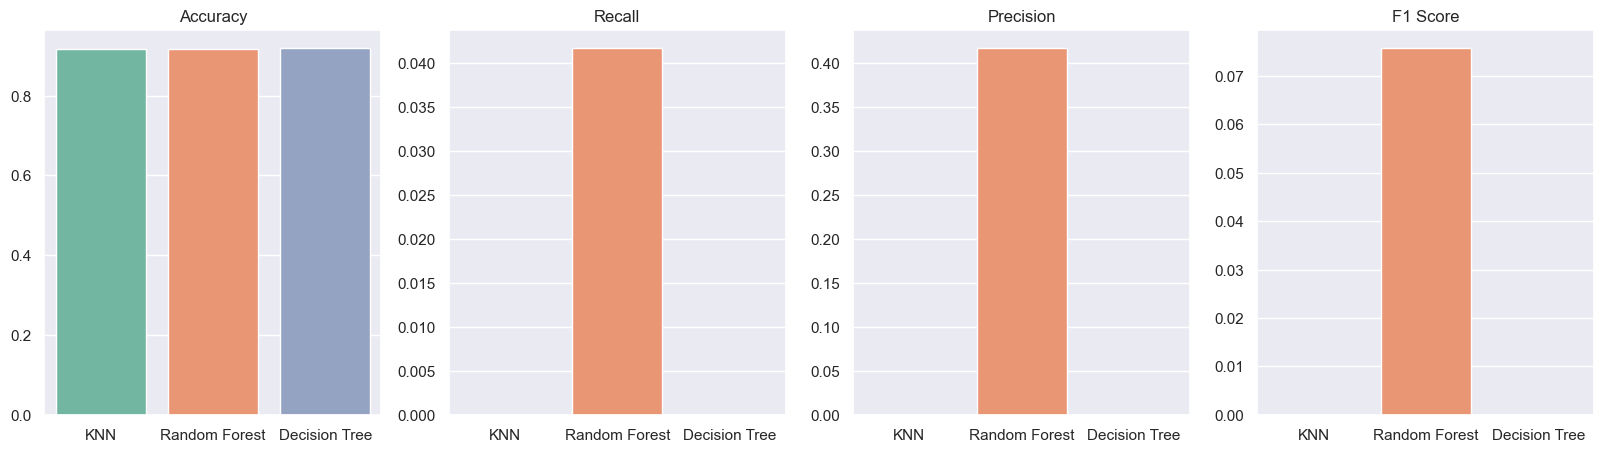

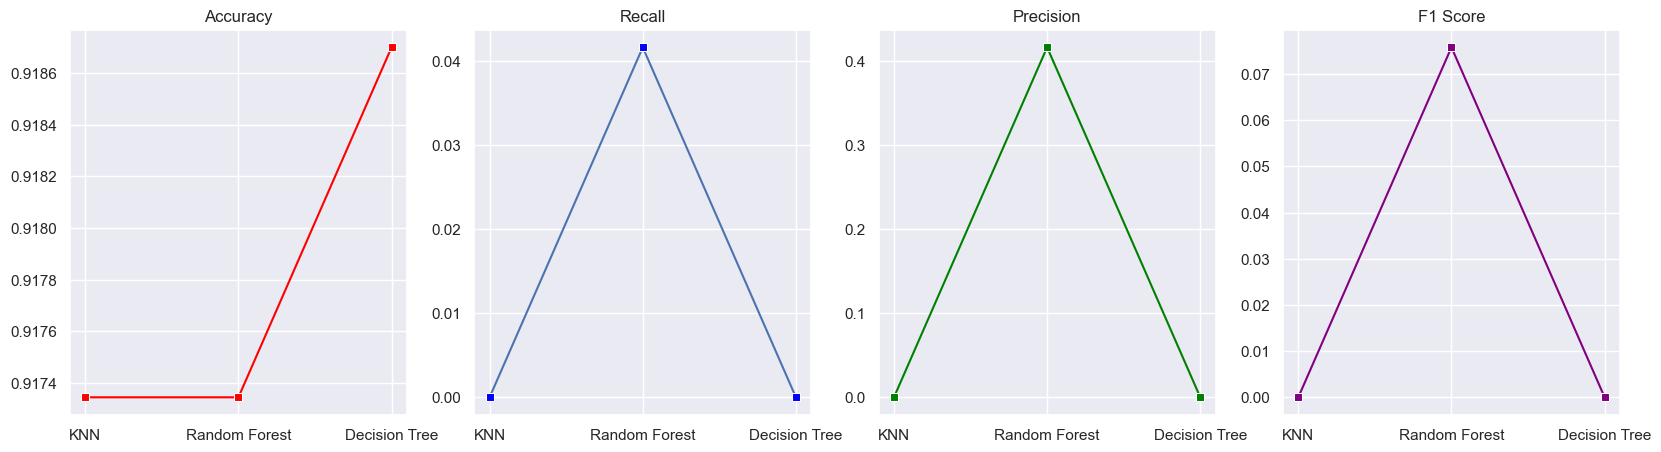

In [53]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
sns.set_style('darkgrid')
sns.barplot(x=labels, y=acc,palette='Set2',ax = ax[0]).set_title("Accuracy");
sns.barplot(x=labels, y=rec,palette='Set2',ax = ax[1]).set_title("Recall");
sns.barplot(x=labels, y=pre,palette='Set2',ax = ax[2]).set_title("Precision");
sns.barplot(x=labels, y=f1,palette='Set2',ax = ax[3]).set_title("F1 Score");

fig, ax = plt.subplots(1,4,figsize=(20,5))
sns.set_style('darkgrid')
sns.lineplot(x=labels, y=acc,palette='Set2',ax = ax[0],marker='s', color='red').set_title("Accuracy");
sns.lineplot(x=labels, y=rec,palette='Set2',ax = ax[1],marker='s', markerfacecolor='blue').set_title("Recall");
sns.lineplot(x=labels, y=pre,palette='Set2',ax = ax[2],marker='s', color='green').set_title("Precision");
sns.lineplot(x=labels, y=f1,palette='Set2',ax = ax[3],marker='s', color='purple').set_title("F1 Score");

After conducting an in-depth analysis of credit risk predictions utilizing machine learning algorithms, namely K-Nearest Neighbors (KNN), Random Forest, and Decision Tree, significant insights into their performance have been gained. Following thorough evaluation and comparison, it is clear that Random Forest stands out as the most proficient algorithm among the trio for forecasting credit risk.